In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

## Explore the Data (EDA)

In [ ]:
df=pd.read_csv('dataset\Bank Customer Churn Prediction.csv')

In [ ]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.drop(columns=['country'],inplace=True)

In [ ]:
# Display basic information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   tenure            10000 non-null  int64  
 3   balance           10000 non-null  float64
 4   products_number   10000 non-null  int64  
 5   credit_card       10000 non-null  int64  
 6   active_member     10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   churn             10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.2 KB
None


In [ ]:
# Display summary statistics of numerical columns
print(df.describe())

       credit_score           age        tenure        balance  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288   
std       96.653299     10.487806      2.892174   62397.405202   
min      350.000000     18.000000      0.000000       0.000000   
25%      584.000000     32.000000      3.000000       0.000000   
50%      652.000000     37.000000      5.000000   97198.540000   
75%      718.000000     44.000000      7.000000  127644.240000   
max      850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25%           1.000000      0.00000       0.0

In [ ]:
# Count the number of missing values in each column
print(df.isnull().sum())

credit_score        0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [ ]:
# Count the number of duplicated values
df.duplicated().sum()

0

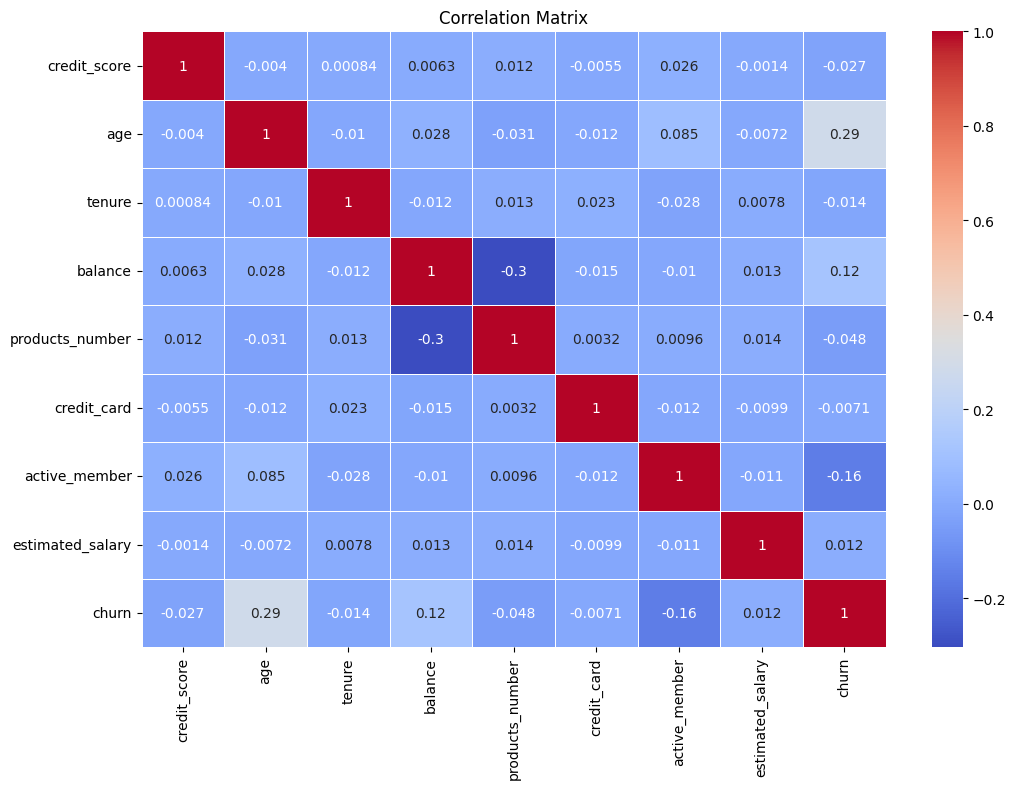

In [ ]:
# Visualize the correlation matrix using a heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

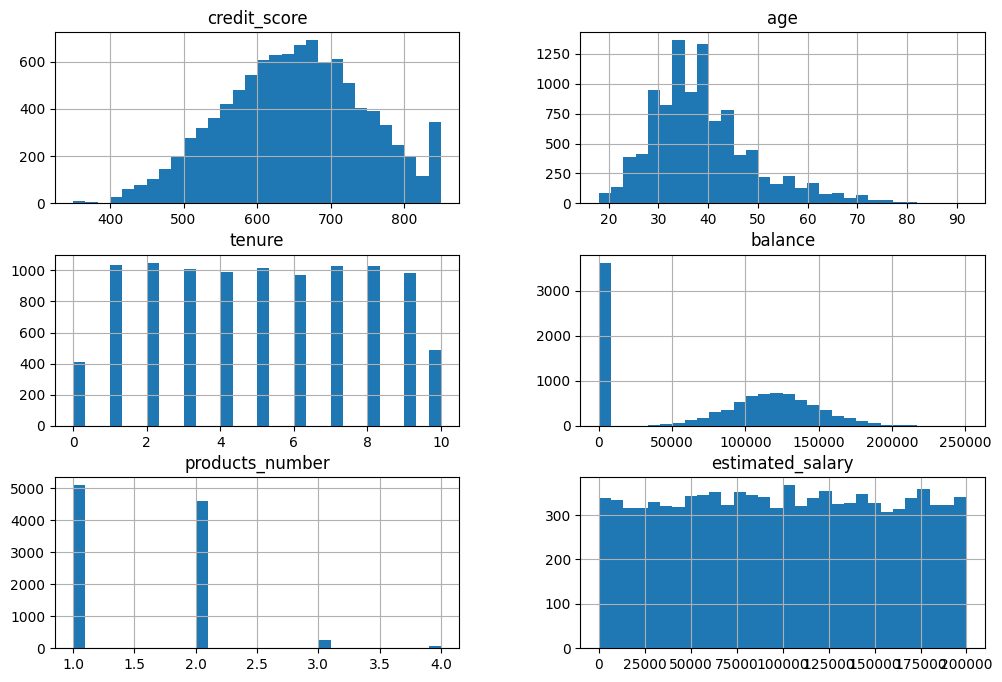

In [ ]:
# Visualize the distribution of numeric features
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
df[numeric_features].hist(bins=30, figsize=(12, 8))
plt.show()

In [ ]:
# # Visualize the distribution of categorical features
# categorical_features = ['country', 'gender', 'credit_card', 'active_member', 'churn']
# for feature in categorical_features:
#     sns.countplot(x=feature, data=df)
#     plt.show()

In [ ]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

## Data Preprocessing

In [ ]:
# #encoding categorical features
# df=pd.get_dummies(df,columns=['country','gender'],drop_first=True)
# df

In [ ]:
#Data Split
X=df.drop(columns=["churn"])
y=df['churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary'],
      dtype='object')

In [ ]:
y_train

7382    0
3992    0
3150    0
3721    0
4298    0
       ..
1520    1
7904    0
8295    0
9212    0
7885    0
Name: churn, Length: 8000, dtype: int64

In [ ]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_trained_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [ ]:
X_trained_scaled

array([[-0.03562509, -1.04733683,  0.34034813, ...,  0.64317752,
        -1.03408041,  0.03118671],
       [ 0.82172187, -0.08856642, -1.73047328, ..., -1.5547807 ,
        -1.03408041, -0.11345121],
       [-0.80000672, -0.37619754,  1.37575883, ..., -1.5547807 ,
         0.96704278,  0.04267421],
       ...,
       [ 0.73908602,  0.10318767,  0.34034813, ...,  0.64317752,
         0.96704278,  0.19747701],
       [ 0.23294143, -0.18444346,  1.72089573, ...,  0.64317752,
         0.96704278, -1.09701714],
       [ 1.46214973,  0.29494175, -1.73047328, ...,  0.64317752,
        -1.03408041, -0.92758523]])

In [ ]:
X_test_scaled

array([[-0.05628405,  0.29494175,  0.34034813, ..., -1.5547807 ,
        -1.03408041,  0.8564217 ],
       [ 1.8133521 ,  1.63722032,  1.03062193, ..., -1.5547807 ,
         0.96704278,  1.06490912],
       [ 0.90435773, -0.2803205 , -0.00478877, ...,  0.64317752,
         0.96704278, -0.06342786],
       ...,
       [ 0.54282587,  3.26713002, -0.00478877, ...,  0.64317752,
         0.96704278,  1.02797032],
       [-0.62440554, -0.2803205 , -1.38533638, ...,  0.64317752,
        -1.03408041, -0.89774669],
       [-0.18023783, -0.37619754,  1.72089573, ...,  0.64317752,
        -1.03408041, -0.60578616]])

## Model training and Evalution

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

There are 2 types of models in keras Sequential or Non-Sequential

In [ ]:
# #Create a sequential model
# model=Sequential()
# #Add a hidden layer with 3 units and sigmoid activation function, expecting input of dimension 11
# model.add(Dense(3,activation='sigmoid',input_dim=11))
# #Add an output layer with 1 unit and sigmoid activation function
# model.add(Dense(1,activation='sigmoid'))

Increase layers

In [ ]:
#Create a sequential model
model=Sequential()
#Add a hidden layer with 11 units and relu activation function, expecting input of dimension 11
model.add(Dense(11,activation='relu',input_dim=8))
#Add a hidden layer with 11 units
model.add(Dense(11,activation='relu'))
#Add an output layer with 1 unit and sigmoid activation function
model.add(Dense(1,activation='sigmoid'))

In [ ]:
#Print a summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                99        
                                                                 
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# #Compile the model with binary crossentropy loss and Adam optimizer
# model.compile(loss='binary_crossentropy',optimizer='Adam')

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
#Train the model using the scaled training data (X_trained_scaled) and training labels (y_train) for 100 epochs
#taking validation data of 20% from train dataset for varification purpose
history=model.fit(X_trained_scaled,y_train,epochs=100,validation_split=0.2)


Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.5325 - accuracy: 0.7842 - val_loss: 0.4760 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4646 - accuracy: 0.7987 - val_loss: 0.4506 - val_accuracy: 0.8081
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4447 - accuracy: 0.8041 - val_loss: 0.4391 - val_accuracy: 0.8050
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4319 - accuracy: 0.8105 - val_loss: 0.4283 - val_accuracy: 0.8112
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4205 - accuracy: 0.8150 - val_loss: 0.4177 - val_accuracy: 0.8175
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8211 - val_loss: 0.4073 - val_accuracy: 0.8231
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8252 - val_loss: 0.3984 - val_accuracy: 0.8256

In [ ]:
#Get the weights of the first hidden layer
first_hidden_layer_weights = model.layers[0].get_weights()

#Get the weights of the second hidden layer
second_hidden_layer_weights = model.layers[1].get_weights()

#Get the weights of the output layer
output_layer_weights = model.layers[2].get_weights()

#Print the weights of the first hidden layer
print("Weights of the first hidden layer:")
print(first_hidden_layer_weights)

#Print the weights of the second hidden layer
print("Weights of the second hidden layer:")
print(second_hidden_layer_weights)

#Print the weights of the output layer
print("Weights of the output layer:")
print(output_layer_weights)

Weights of the first hidden layer:
[array([[-0.17210123,  0.13722289,  0.11143184, -0.0585636 , -0.32888633,
        -0.16479321, -0.06456336, -0.02517295, -0.05096751, -0.00497285,
         0.36160553],
       [-0.26367587, -0.09715927, -0.582447  , -0.3570661 , -0.46134377,
         0.1301715 , -0.1272838 ,  0.6675831 ,  1.1294081 , -0.1875227 ,
        -0.9611491 ],
       [-0.5405755 ,  0.07006838,  0.01966025, -0.03510701,  0.26497853,
         0.2962828 ,  0.07861844,  0.07664403,  0.01496637, -0.02655035,
        -0.7380853 ],
       [ 0.03176   , -0.9667254 ,  0.08692508, -0.06629515,  0.37132022,
         0.31844848, -1.037663  , -0.09002393, -0.05696533, -0.57152236,
        -0.07616405],
       [-0.3575723 ,  0.14764456, -0.1796644 ,  1.2611973 ,  0.40923187,
        -0.7249921 ,  0.10510626,  0.11108927,  0.24915588,  1.1552483 ,
         0.5879868 ],
       [-0.07068017,  0.58463126,  0.24394773,  0.16287652, -0.30020764,
         0.11261442,  0.27527738,  0.12675741, -0.1

In [ ]:
#do prediction for X_test
model.predict(X_test_scaled)
#we are not getting 0/1 because output is passed through sigmoid function which is giving probability in output

63/63 [==============================] - 0s 1ms/step


array([[0.5209094 ],
       [0.15156238],
       [0.01256008],
       ...,
       [0.08166689],
       [0.02139786],
       [0.00882911]], dtype=float32)

In [ ]:
y_log=model.predict(X_test_scaled)
#if y_pred is greater than 0.5 then show output as 1 nor 0
y_pred=np.where(y_log>0.5,1,0)

63/63 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.864

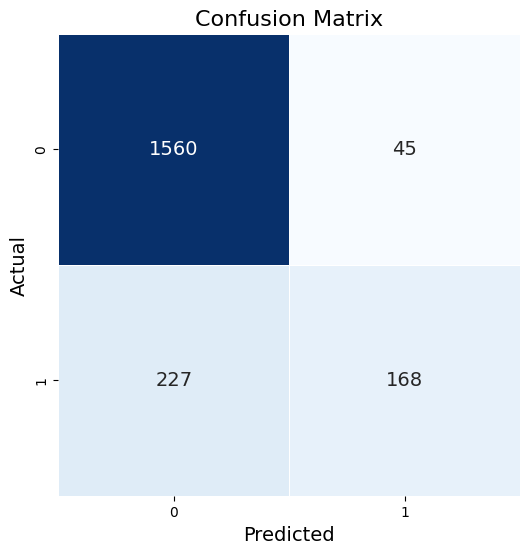

In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 14}, linewidths=0.5, square=True)

plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.show()

In [ ]:
history.history

{'loss': [0.5325214862823486,
  0.4646354913711548,
  0.4447236657142639,
  0.4319237470626831,
  0.42048558592796326,
  0.4092836081981659,
  0.3992418050765991,
  0.39041033387184143,
  0.3831540048122406,
  0.37799495458602905,
  0.37362030148506165,
  0.37070372700691223,
  0.3685564398765564,
  0.36673495173454285,
  0.3658074140548706,
  0.36408233642578125,
  0.36329764127731323,
  0.3612349033355713,
  0.36099499464035034,
  0.3601261377334595,
  0.35954245924949646,
  0.3595516085624695,
  0.35817795991897583,
  0.35814395546913147,
  0.35757705569267273,
  0.35712313652038574,
  0.35670989751815796,
  0.3561437726020813,
  0.35609927773475647,
  0.3556036055088043,
  0.355105996131897,
  0.3549034595489502,
  0.35413241386413574,
  0.35363709926605225,
  0.3536755442619324,
  0.353145956993103,
  0.35307738184928894,
  0.3526785671710968,
  0.35260209441185,
  0.3525891900062561,
  0.35204482078552246,
  0.3515045940876007,
  0.3513030707836151,
  0.3512023687362671,
  0.3508

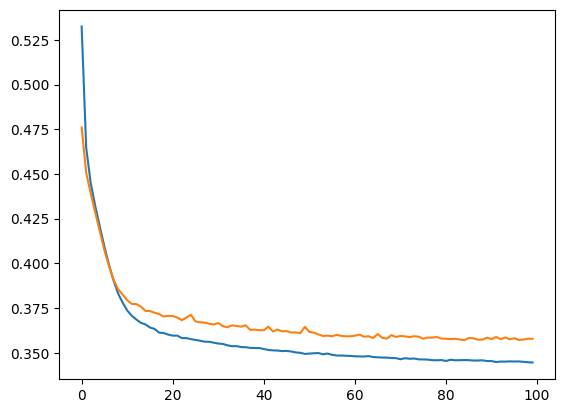

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

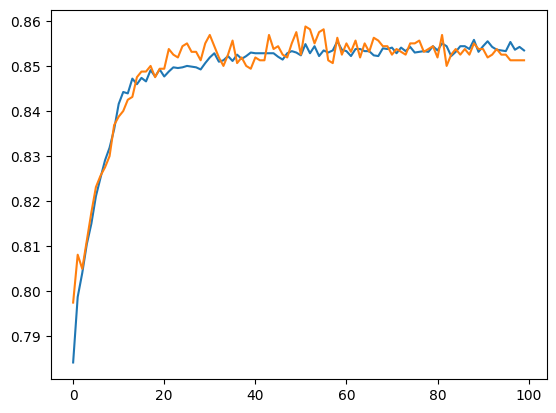

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
# Save the trained model
model.save('churn_prediction_model.h5')

print("Model saved successfully!")


Model saved successfully!


In [ ]:
from IPython.display import FileLink

FileLink('churn_prediction_model.h5')

/content/churn_prediction_model.h5